In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.dpi'] = '600'
cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.figsize'] = [3*cm, 4*cm]


In [2]:
SONdepl_0h_path = "../data/SONdepletion/0h/"
SONdepl_7h_path = "../data/SONdepletion/7h/"
control_0h_path = "../data/DMSOcontrol/0h/"
control_7h_path = "../data/DMSOcontrol/7h/"

In [3]:
#load and concatenate data for SON depletion intial timepoint

df = pd.DataFrame()
for num in range(1,12):
    SON_0h= pd.read_csv(SONdepl_0h_path+"{}.csv".format(num))
    tmp = pd.DataFrame()
    tmp["Distance"] = SON_0h["Distance_(inches)"] / np.max(SON_0h["Distance_(inches)"]) #normalization
    tmp["intensity"] = SON_0h["Gray_Value"] / np.max(SON_0h["Gray_Value"])
    tmp['timepoint'] = '0h'
    tmp['cell_num'] = num
    
    df = pd.concat([df, tmp])
    
df.head()

,Distance,intensity,timepoint,cell_num
0,0.000000,0.325688,0h,1
1,0.007575,0.398611,0h,1
2,0.015152,0.447592,0h,1
3,0.022727,0.513479,0h,1
4,0.030302,0.548478,0h,1


In [4]:
#load and concatenate data for SON depletion final timepoint

for num in range(1,12):
    SON_7h= pd.read_csv(SONdepl_7h_path+"{}.csv".format(num))
    tmp = pd.DataFrame()
    tmp["Distance"] = SON_7h["Distance_(inches)"] / np.max(SON_7h["Distance_(inches)"]) #normalization
    tmp["intensity"] = SON_7h["Gray_Value"] / np.max(SON_7h["Gray_Value"])
    tmp['timepoint'] = '7h'
    tmp['cell_num'] = num
    
    df = pd.concat([df, tmp])
    
df.tail()

,Distance,intensity,timepoint,cell_num
107,0.963965,0.677438,7h,11
108,0.972973,0.703584,7h,11
109,0.981981,0.789658,7h,11
110,0.990992,0.906579,7h,11
111,1.000000,1.000000,7h,11


In [5]:
#round distance values

df['norm_distance'] = df["Distance"].round(decimals=2)
df.head()

,Distance,intensity,timepoint,cell_num,norm_distance
0,0.000000,0.325688,0h,1,0.00
1,0.007575,0.398611,0h,1,0.01
2,0.015152,0.447592,0h,1,0.02
3,0.022727,0.513479,0h,1,0.02
4,0.030302,0.548478,0h,1,0.03


In [6]:
#load and concatenate data for DMSO control intial timepoint

df_control = pd.DataFrame()
for num in range(1,12):
    control_0h= pd.read_csv(control_0h_path+"{}.csv".format(num))
    tmp = pd.DataFrame()
    tmp["Distance"] = control_0h["Distance_(inches)"] / np.max(control_0h["Distance_(inches)"]) #normalization so they all end at 1
    tmp["intensity"] = control_0h["Gray_Value"] / np.max(control_0h["Gray_Value"])
    tmp['timepoint'] = '0h'
    tmp['cell_num'] = num
    
    df_control = pd.concat([df_control, tmp])
    
df_control.head()

,Distance,intensity,timepoint,cell_num
0,0.000000,0.539841,0h,1
1,0.010637,0.695890,0h,1
2,0.021278,0.885956,0h,1
3,0.031915,1.000000,0h,1
4,0.042552,0.973364,0h,1


In [7]:
#load and concatenate data for DMSO control final timepoint
 
for num in range(1,12):
    control_7h= pd.read_csv(control_7h_path+"{}.csv".format(num))
    tmp = pd.DataFrame()
    tmp["Distance"] = control_7h["Distance_(inches)"] / np.max(control_7h["Distance_(inches)"]) #normalization so they all end at 1
    tmp["intensity"] = control_7h["Gray_Value"] / np.max(control_7h["Gray_Value"])
    tmp['timepoint'] = '7h'
    tmp['cell_num'] = num
    
    df_control = pd.concat([df_control, tmp])
    
df_control.tail()

,Distance,intensity,timepoint,cell_num
111,0.965218,0.349457,7h,11
112,0.973913,0.442492,7h,11
113,0.982610,0.527298,7h,11
114,0.991305,0.561662,7h,11
115,1.000000,0.534848,7h,11


In [8]:
#round distance values

df_control['norm_distance'] = df_control["Distance"].round(decimals=2)
df_control.head()


,Distance,intensity,timepoint,cell_num,norm_distance
0,0.000000,0.539841,0h,1,0.00
1,0.010637,0.695890,0h,1,0.01
2,0.021278,0.885956,0h,1,0.02
3,0.031915,1.000000,0h,1,0.03
4,0.042552,0.973364,0h,1,0.04


In [ ]:
#merge the dataframes and add the treatment column

df['treatment'] = "SON_depletion"
df_control['treatment'] = "DMSO_control"

merged_df = pd.concat([df_control,df])


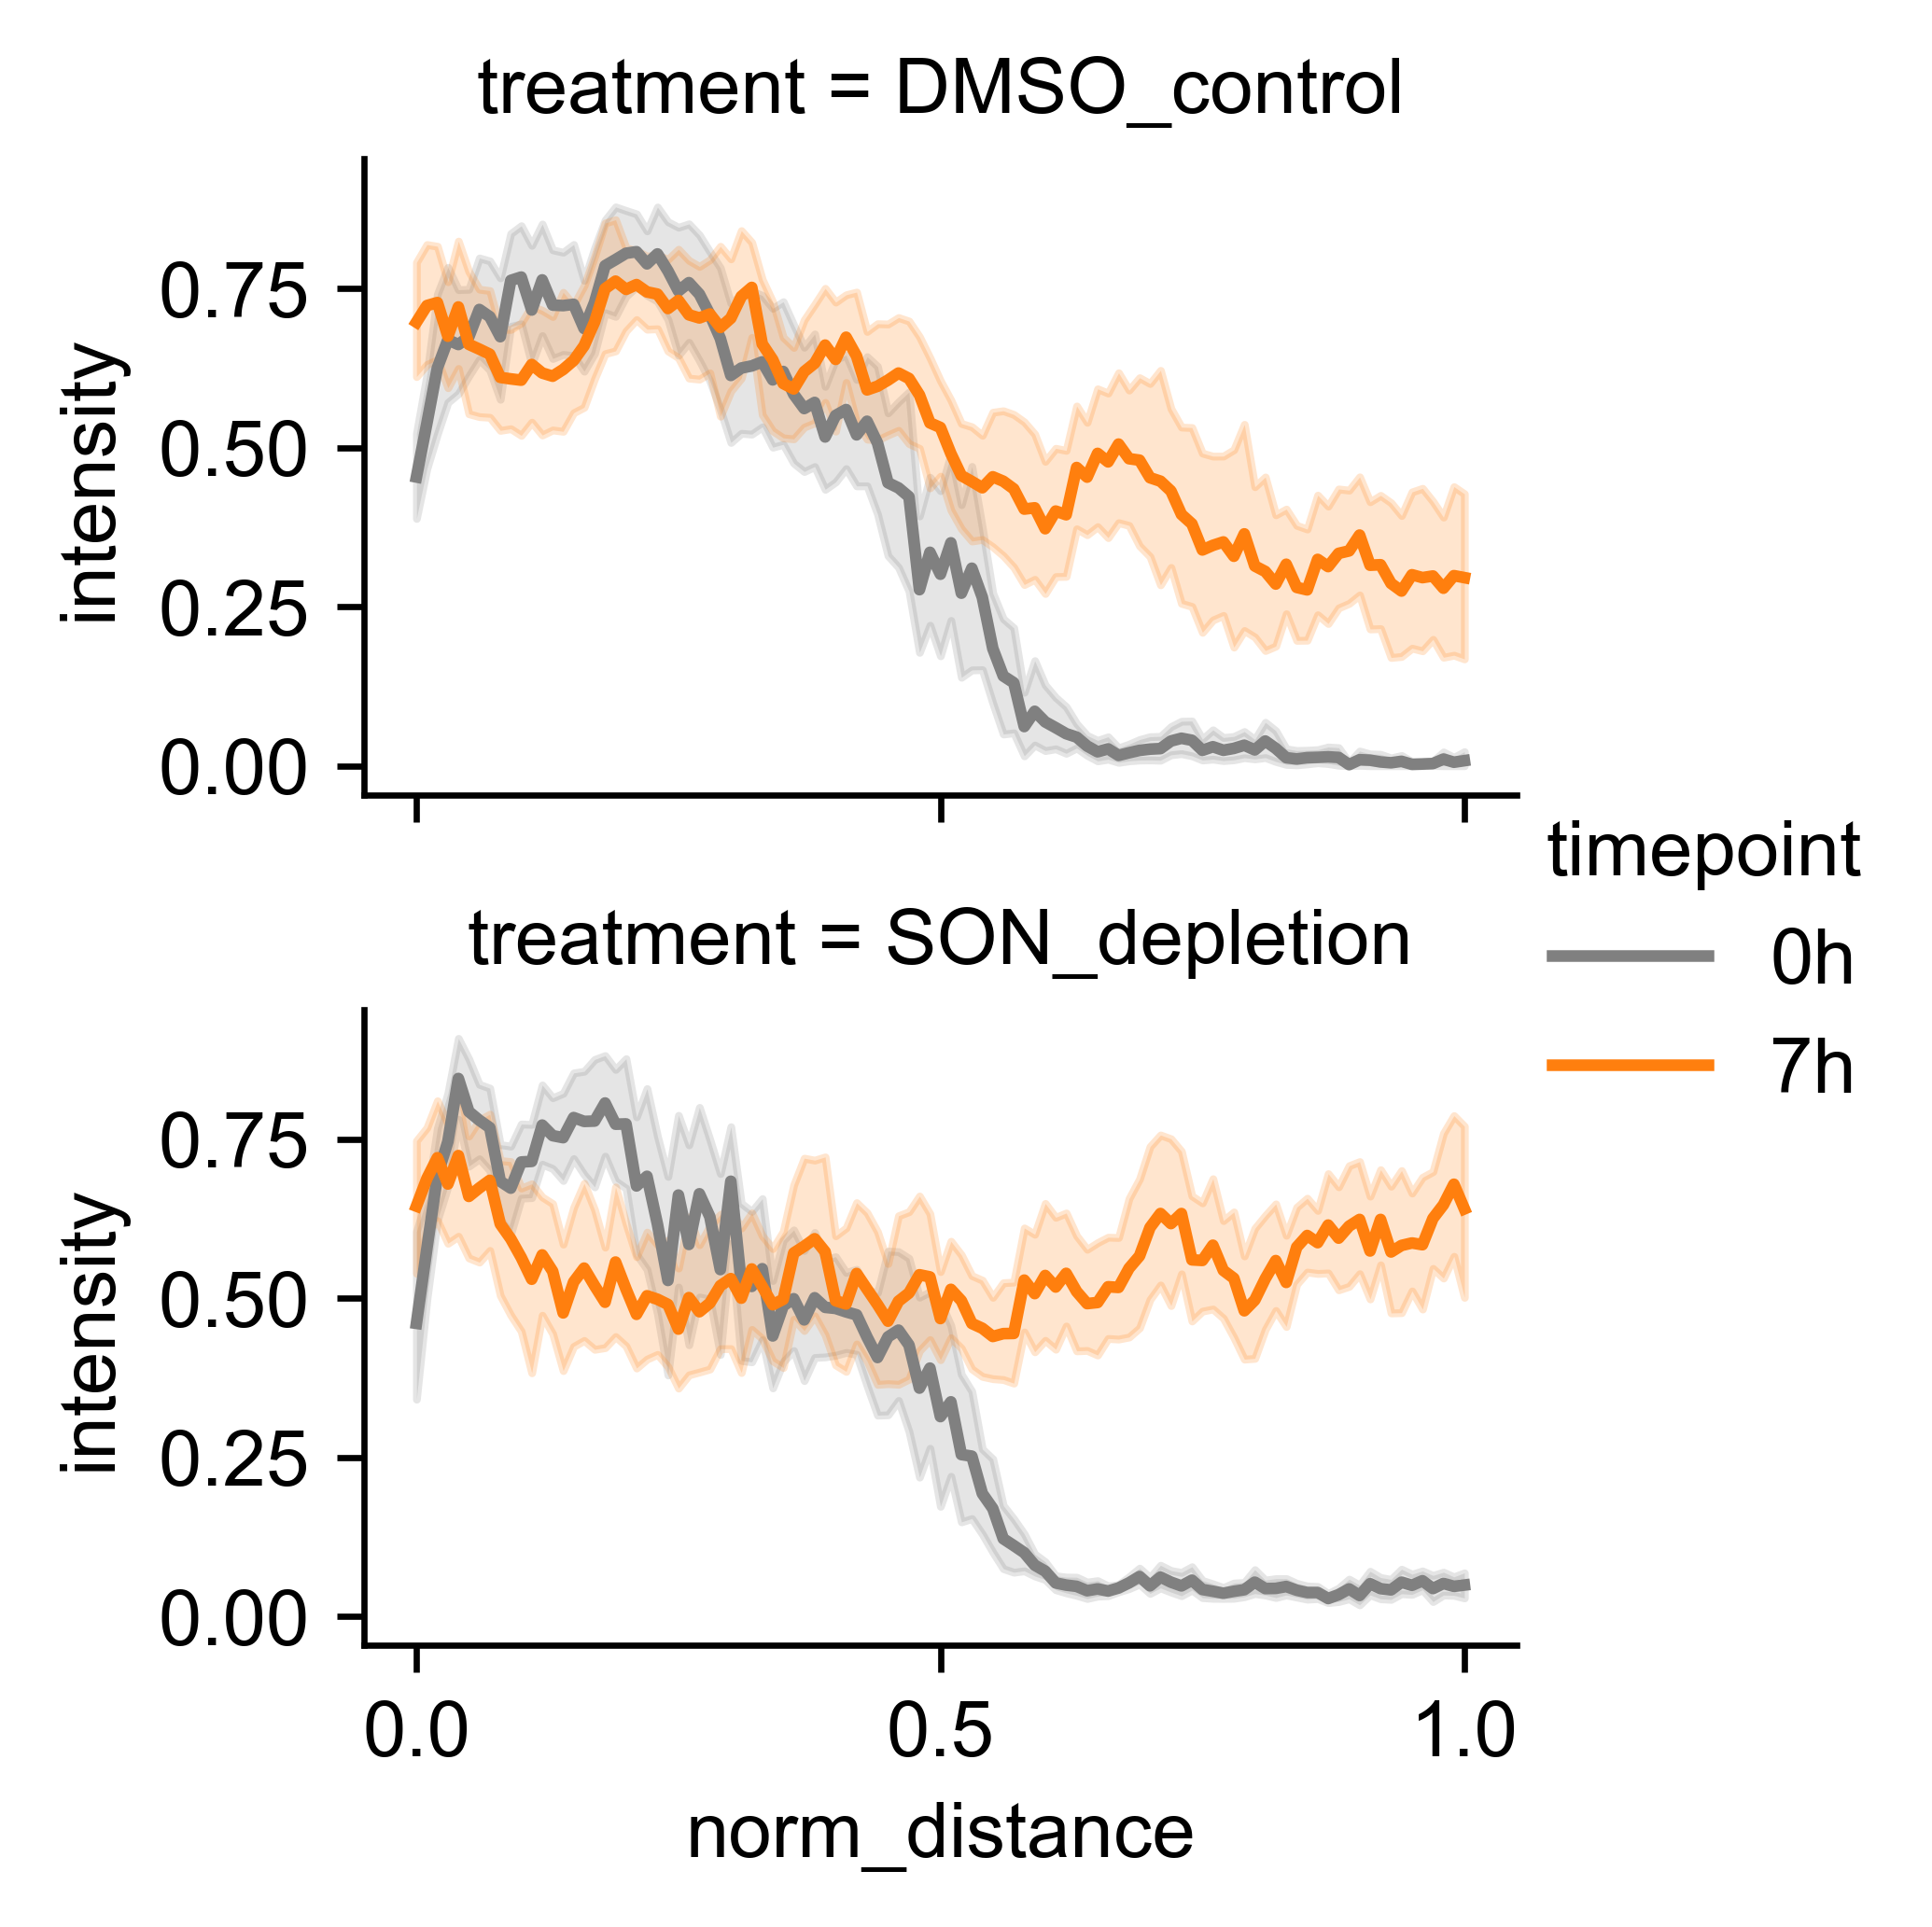

In [11]:
#plot the data

sns.relplot(merged_df, kind='line', 
            x="norm_distance", y='intensity', hue='timepoint', row='treatment',
            palette=['grey',sns.color_palette()[1]],
            height=4.5*cm, aspect=1/0.6)